<a href="https://colab.research.google.com/github/Rajyalaxmi29/pandas/blob/main/pandas_to_dict_pract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1: Data Understanding & Pandas Basics

Using a real dataset:

Load the dataset into Pandas

Display:

shape

column names

data types

Check missing values column-wise

Drop rows where a specific important column has missing values

Rename at least 2 columns

🔹 Concepts covered:
read_csv, shape, info(), isnull(), dropna(), rename()

In [35]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    "EmployeeID": [201, 202, 203, 204, 205, 206, 207, 208, 209, 210],
    "Department": ["HR", "IT", "Finance", np.nan, "HR", "Finance", "IT", "HR", np.nan, "IT"],
    "Age": [25, 30, np.nan, 35, 29, 42, np.nan, 26, 38, 34],
    "Salary": [35000, 60000, 55000, np.nan, 40000, 85000, 65000, 37000, np.nan, 72000],
    "Experience": [2, 6, 4, 10, np.nan, 18, 7, 2, 12, np.nan],
    "PerformanceScore": [3.5, 4.2, np.nan, 4.6, 3.6, 4.8, 4.1, np.nan, 4.5, 4.3],
    "Gender": ["F", "M", "F", "M", np.nan, "M", "M", "F", "M", np.nan]
})
df



,EmployeeID,Department,Age,Salary,Experience,PerformanceScore,Gender
0,201,HR,25.0,35000.0,2.0,3.5,F
1,202,IT,30.0,60000.0,6.0,4.2,M
2,203,Finance,NaN,55000.0,4.0,NaN,F
3,204,NaN,35.0,NaN,10.0,4.6,M
4,205,HR,29.0,40000.0,NaN,3.6,NaN
5,206,Finance,42.0,85000.0,18.0,4.8,M
6,207,IT,NaN,65000.0,7.0,4.1,M
7,208,HR,26.0,37000.0,2.0,NaN,F
8,209,NaN,38.0,NaN,12.0,4.5,M
9,210,IT,34.0,72000.0,NaN,4.3,NaN


In [36]:
df.shape
df.columns#col names
df.dtypes
df.isnull().sum()
df.dropna()
df.rename(columns={'EmployeeID':'empid','Age':'age'})

,empid,Department,age,Salary,Experience,PerformanceScore,Gender
0,201,HR,25.0,35000.0,2.0,3.5,F
1,202,IT,30.0,60000.0,6.0,4.2,M
2,203,Finance,NaN,55000.0,4.0,NaN,F
3,204,NaN,35.0,NaN,10.0,4.6,M
4,205,HR,29.0,40000.0,NaN,3.6,NaN
5,206,Finance,42.0,85000.0,18.0,4.8,M
6,207,IT,NaN,65000.0,7.0,4.1,M
7,208,HR,26.0,37000.0,2.0,NaN,F
8,209,NaN,38.0,NaN,12.0,4.5,M
9,210,IT,34.0,72000.0,NaN,4.3,NaN


Question 2: Missing Value Handling (CRITICAL)

Using the same DataFrame, do the following step by step:

Identify which numerical columns have missing values

Identify which categorical columns have missing values

Fill missing values in:

age → using mean

Salary → using median

Experience → using median

Fill missing values in:

Department

Gender
using the most frequent value

Drop rows where PerformanceScore is missing

Verify that no missing values remain

In [37]:
df.isnull().sum()
m=df['Age'].mean()
df['Age']=df['Age'].fillna(m)
me=df['Salary'].median()
df['Salary']=df['Salary'].fillna(me)
me=df['Experience'].median()
df['Experience']=df['Experience'].fillna(me)
df['Department']=df['Department'].fillna(method='bfill')
m=df['Gender'].value_counts().index[0]
df['Gender']=df['Gender'].fillna(m)
df

/tmp/ipython-input-1844607557.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Department']=df['Department'].fillna(method='bfill')


,EmployeeID,Department,Age,Salary,Experience,PerformanceScore,Gender
0,201,HR,25.000,35000.0,2.0,3.5,F
1,202,IT,30.000,60000.0,6.0,4.2,M
2,203,Finance,32.375,55000.0,4.0,NaN,F
3,204,HR,35.000,57500.0,10.0,4.6,M
4,205,HR,29.000,40000.0,6.5,3.6,M
5,206,Finance,42.000,85000.0,18.0,4.8,M
6,207,IT,32.375,65000.0,7.0,4.1,M
7,208,HR,26.000,37000.0,2.0,NaN,F
8,209,IT,38.000,57500.0,12.0,4.5,M
9,210,IT,34.000,72000.0,6.5,4.3,M


🔹 QUESTION: NumPy + Pandas Integration (Interview-Level)

Using the same cleaned DataFrame, perform the following tasks:

Task Requirements

Select the Salary column and convert it into a NumPy array

Using NumPy only, calculate:

mean

median

standard deviation

Normalize the Salary values using the formula:

Normalized Salary
=
𝑥
−
mean
standard deviation
Normalized Salary=
standard deviation
x−mean
	​


Add the normalized values back into the DataFrame as a new column

Verify that:

the new column exists

original Salary values are unchanged

In [38]:
import numpy as np
s=df['Salary'].to_numpy()
s
m=np.mean(s)
m
me=np.median(s)
me
std=np.std(s)
std
n=(s-m)/std
n
df['normalized_salary']=n
df


,EmployeeID,Department,Age,Salary,Experience,PerformanceScore,Gender,normalized_salary
0,201,HR,25.000,35000.0,2.0,3.5,F,-1.424800
1,202,IT,30.000,60000.0,6.0,4.2,M,0.239686
2,203,Finance,32.375,55000.0,4.0,NaN,F,-0.093211
3,204,HR,35.000,57500.0,10.0,4.6,M,0.073237
4,205,HR,29.000,40000.0,6.5,3.6,M,-1.091903
5,206,Finance,42.000,85000.0,18.0,4.8,M,1.904172
6,207,IT,32.375,65000.0,7.0,4.1,M,0.572583
7,208,HR,26.000,37000.0,2.0,NaN,F,-1.291641
8,209,IT,38.000,57500.0,12.0,4.5,M,0.073237
9,210,IT,34.000,72000.0,6.5,4.3,M,1.038639


Question: Visualization + Insight (Matplotlib)

Using the same DataFrame, do the following:

Create a bar chart showing
→ Average Salary by Department

Create a histogram of
→ normalized_salary

Add:

title

x-label

y-label

grid

Ensure plots are readable and interpretable

In [58]:

a=df.groupby('Department').Salary.mean()
a

,Salary
Department,
Finance,70000.0
HR,42375.0
IT,63625.0


(array([3., 5., 2.]),
 array([-1.42479982, -0.31514264,  0.79451454,  1.90417172]),
 <BarContainer object of 3 artists>)

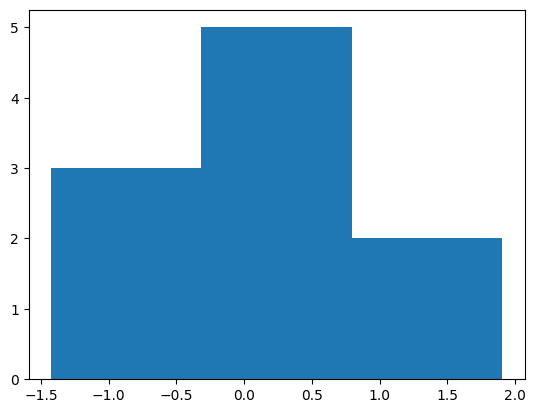

In [60]:
import matplotlib.pyplot as plt
sal=df['Salary'].to_numpy()
dep=df['Department'].to_numpy()
nor=df['normalized_salary'].to_numpy()
plt.hist(nor,bins=3)
# a=df.groupby('Department').Salary.mean()
# a
# plt.bar(dep,a)
# plt.xlabel("department")
# plt.ylabel("salary")
# plt.grid(True)
# plt.show()

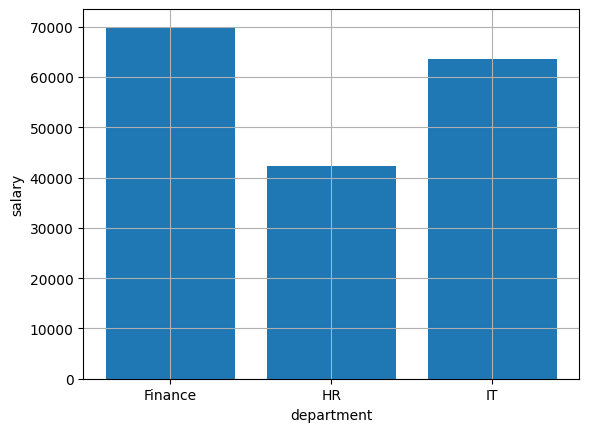

In [66]:
a=df.groupby('Department').Salary.mean()
a

plt.bar(a.index,a.values)
plt.xlabel("department")
plt.ylabel("salary")
plt.grid(True)
plt.show()